In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.combine import SMOTEENN
import joblib
import warnings
warnings.filterwarnings('ignore')

In [34]:
plt.style.use('ggplot')
sns.set_style('darkgrid')

In [11]:
df1 = pd.read_csv('first_hotel.csv')

In [12]:
df1.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month,family_size,family_categorize,lead_time_category,booking_changes_category,year
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,0,0,Check-Out,2015-07-01,July,2.0,Small Family,305-366,1-5,2015
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,0,0,Check-Out,2015-07-01,July,2.0,Small Family,671-737,1-5,2015
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,0,0,Check-Out,2015-07-02,July,1.0,Single,0-61,0,2015
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,0,0,Check-Out,2015-07-02,July,1.0,Single,0-61,0,2015
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,0,1,Check-Out,2015-07-03,July,2.0,Small Family,0-61,0,2015


In [13]:
df1.columns

Index(['Unnamed: 0', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'month', 'family_size',
       'family_categorize', 'lead_time_category', 'booking_changes_category',
       'year'],
      dtype='object')

##### Drop the columns that have not a huge impact on our model

In [5]:
irrelevant_columns = [
    'Unnamed: 0',               
    'arrival_date_year',        
    'arrival_date_month',        
    'arrival_date_week_number',  
    'arrival_date_day_of_month', 
    'reservation_status_date',   
    'reservation_status',        
    'family_categorize',         
    'lead_time_category',        
    'booking_changes_category', 
    'country',                    
    'month',                       
    'adults',                       
    'children',                  
    'babies',                     
    'assigned_room_type',           
    'required_car_parking_spaces',  
    'booking_changes',              
    'stays_in_weekend_nights',     
    'stays_in_week_nights' 
]

In [14]:
df1.drop(columns=irrelevant_columns, inplace = True)

In [15]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'meal', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'total_of_special_requests', 'family_size', 'year'],
      dtype='object')

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118897 entries, 0 to 118896
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118897 non-null  object 
 1   is_canceled                     118897 non-null  int64  
 2   lead_time                       118897 non-null  int64  
 3   meal                            118897 non-null  object 
 4   market_segment                  118897 non-null  object 
 5   distribution_channel            118897 non-null  object 
 6   is_repeated_guest               118897 non-null  int64  
 7   previous_cancellations          118897 non-null  int64  
 8   previous_bookings_not_canceled  118897 non-null  int64  
 9   reserved_room_type              118897 non-null  object 
 10  deposit_type                    118897 non-null  object 
 11  days_in_waiting_list            118897 non-null  int64  
 12  customer_type   

In [17]:
df = pd.get_dummies(df1, drop_first= True)

In [18]:
df.head()

,is_canceled,lead_time,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr,total_of_special_requests,family_size,year,...,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,0,0,0,0,0.0,0,2.0,2015,...,False,False,False,False,False,False,False,False,True,False
1,0,737,0,0,0,0,0.0,0,2.0,2015,...,False,False,False,False,False,False,False,False,True,False
2,0,7,0,0,0,0,75.0,0,1.0,2015,...,False,False,False,False,False,False,False,False,True,False
3,0,13,0,0,0,0,75.0,0,1.0,2015,...,False,False,False,False,False,False,False,False,True,False
4,0,14,0,0,0,0,98.0,1,2.0,2015,...,False,False,False,False,False,False,False,False,True,False


In [19]:
df.columns

Index(['is_canceled', 'lead_time', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'days_in_waiting_list', 'adr', 'total_of_special_requests',
       'family_size', 'year', 'hotel_Resort Hotel', 'meal_FB', 'meal_HB',
       'meal_SC', 'meal_Undefined', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'distribution_channel_Direct',
       'distribution_channel_GDS', 'distribution_channel_TA/TO',
       'distribution_channel_Undefined', 'reserved_room_type_B',
       'reserved_room_type_C', 'reserved_room_type_D', 'reserved_room_type_E',
       'reserved_room_type_F', 'reserved_room_type_G', 'reserved_room_type_H',
       'reserved_room_type_L', 'reserved_room_type_P',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'customer_type_Group', 'customer_type_Transient',
       'customer_

### Splitting the data

In [20]:
x = df.drop(columns='is_canceled')

In [21]:
y = df.is_canceled

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=100)

### Decision Tree Classifier

In [23]:
model_dt = DecisionTreeClassifier(criterion = 'gini', random_state=100, max_depth = 6, min_samples_leaf = 8)

In [24]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [25]:
y_pred = model_dt.predict(x_test)

In [27]:
print("Accuracy of Decision Tree model : ",accuracy_score(y_test,y_pred))

Accuracy of Decision Tree model :  0.8102326885337819


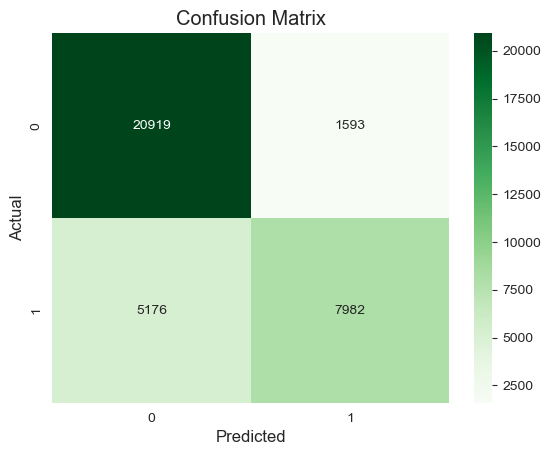

In [35]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [36]:
print("Classification Report : \n", classification_report(y_test, y_pred))

Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.93      0.86     22512
           1       0.83      0.61      0.70     13158

    accuracy                           0.81     35670
   macro avg       0.82      0.77      0.78     35670
weighted avg       0.81      0.81      0.80     35670



##### Due to the lower recall for the minority class (Canceled bookings), indicating that the model is missing a significant number of canceled bookings, 
##### I am proceeding to apply SMOTENN to address class imbalance and improve the model's ability to correctly identify cancellations.

In [41]:
sm = SMOTEENN()

In [42]:
x_resample, y_resample = sm.fit_resample(x,y)

In [43]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resample, y_resample, test_size=0.30, random_state=100)

In [44]:
model_dt_smote = DecisionTreeClassifier(criterion = 'gini', random_state=100, max_depth = 6, min_samples_leaf = 8)

In [45]:
model_dt_smote.fit(xr_train,yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [46]:
yr_pred = model_dt_smote.predict(xr_test)

In [49]:
print("Accuracy of Decision Tree model after smotenn : ",accuracy_score(yr_test,yr_pred))

Accuracy of Decision Tree model after smotenn :  0.8590044488037272


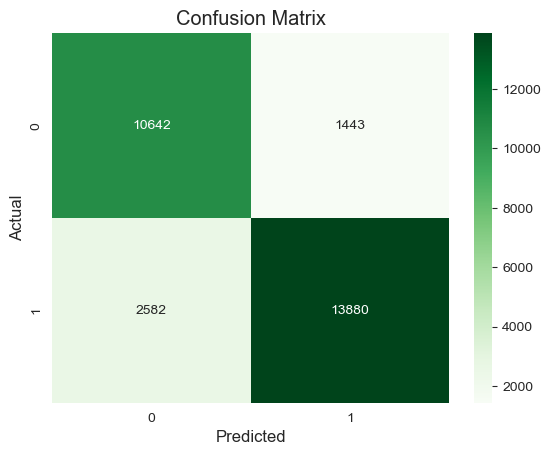

In [50]:
cm = confusion_matrix(yr_test,yr_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [51]:
print("Classification Report after smotenn : \n", classification_report(yr_test, yr_pred))

Classification Report after smotenn : 
               precision    recall  f1-score   support

           0       0.80      0.88      0.84     12085
           1       0.91      0.84      0.87     16462

    accuracy                           0.86     28547
   macro avg       0.86      0.86      0.86     28547
weighted avg       0.86      0.86      0.86     28547



##### After applying SMOTENN, the model's recall for the minority class improved significantly, resulting in better overall performance with a balanced recall and precision.
##### Additionally, the accuracy improved from 81% to 86%, reflecting the positive impact of handling class imbalance.

### Random Forest Classifier

In [53]:
model_rf = RandomForestClassifier(criterion = 'gini', random_state = 100, n_estimators=100, min_samples_leaf = 8, max_depth = 6)

In [54]:
model_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [55]:
y_pred_rf = model_rf.predict(x_test)

In [57]:
print("Accuracy of RForest Classifier : ",accuracy_score(y_test,y_pred_rf))

Accuracy of RForest Classifier :  0.7762545556490048


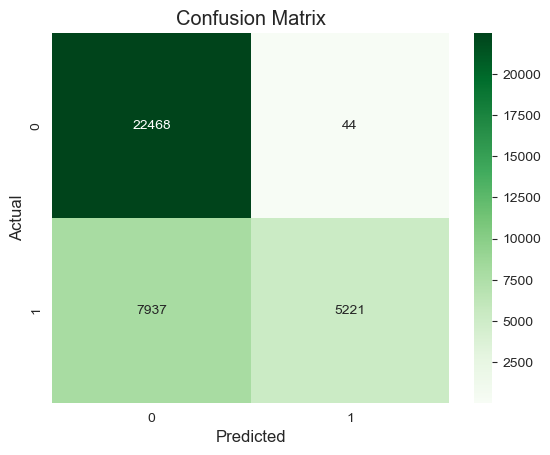

In [58]:
cm = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [59]:
print("Classification Report of RForest : \n", classification_report(y_test, y_pred_rf))

Classification Report of RForest : 
               precision    recall  f1-score   support

           0       0.74      1.00      0.85     22512
           1       0.99      0.40      0.57     13158

    accuracy                           0.78     35670
   macro avg       0.87      0.70      0.71     35670
weighted avg       0.83      0.78      0.75     35670



##### Since the recall for the minority class (Canceled bookings) is very low, 
##### I am proceeding with SMOTENN to address the class imbalance and improve the model's ability to correctly identify canceled bookings.

In [62]:
model_rf_smote = RandomForestClassifier(criterion = 'gini', random_state = 100, n_estimators=100, min_samples_leaf = 8, max_depth = 6)

In [63]:
model_rf_smote.fit(x_resample,y_resample)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [64]:
yr_pred_rf = model_rf_smote.predict(xr_test)

In [66]:
print("Accuracy of RForest after smotenn : ",accuracy_score(yr_test, yr_pred_rf))

Accuracy of RForest after smotenn :  0.8500367814481382


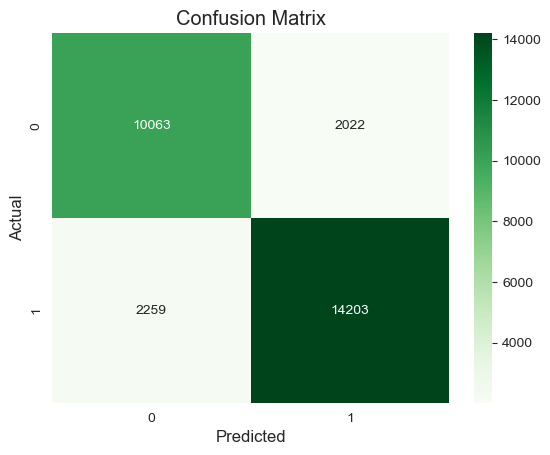

In [67]:
cm = confusion_matrix(yr_test,yr_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [68]:
print("Classification Report of RForest after smote: \n", classification_report(yr_test, yr_pred_rf))

Classification Report of RForest after smote: 
               precision    recall  f1-score   support

           0       0.82      0.83      0.82     12085
           1       0.88      0.86      0.87     16462

    accuracy                           0.85     28547
   macro avg       0.85      0.85      0.85     28547
weighted avg       0.85      0.85      0.85     28547



##### After applying SMOTE, both precision and recall for the minority class (Canceled bookings) improved, leading to a more balanced model with an increased accuracy of 85%.

##### I am proceeding with hyperparameter tuning for Random Forest because it has shown better performance in terms of accuracy and recall after applying SMOTE

### Hyper parameter tuning

In [70]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

In [71]:
rf = RandomForestClassifier(random_state = 100)

In [72]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

In [73]:
grid_search.fit(xr_train, yr_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 10, None],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [75]:
print("Best parameters : ", grid_search.best_params_)
print("Best accuracy : ", grid_search.best_score_)

Best parameters :  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy :  0.9540145287109256


In [76]:
best_rf = grid_search.best_estimator_

In [77]:
y_pred_tuned = best_rf.predict(xr_test)

In [79]:
print("Accuracy of RForest after hyperparameter tuning :",accuracy_score(yr_test,y_pred_tuned))

Accuracy of RForest after hyperparameter tuning : 0.9628332224051565


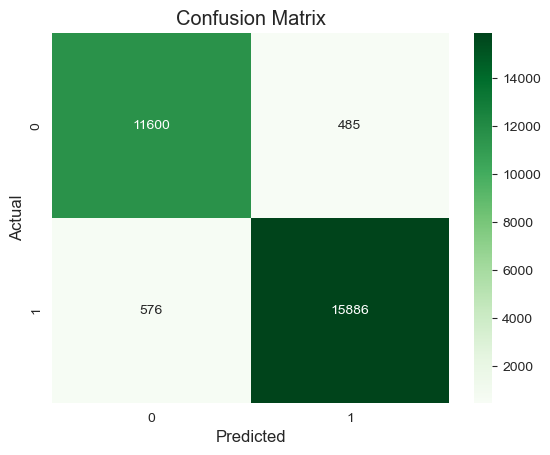

In [80]:
cm = confusion_matrix(yr_test,y_pred_tuned)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [81]:
print("Classification Report of RForest after tuning: \n", classification_report(yr_test, y_pred_tuned))

Classification Report of RForest after tuning: 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96     12085
           1       0.97      0.97      0.97     16462

    accuracy                           0.96     28547
   macro avg       0.96      0.96      0.96     28547
weighted avg       0.96      0.96      0.96     28547



##### After hyperparameter tuning, the Random Forest model achieved improved performance with a 96% accuracy, demonstrating enhanced precision, recall, and F1-score for both classes.

### Saving the model

In [83]:
filename = 'model.sav'

In [84]:
joblib.dump(best_rf, filename)

['model.sav']

In [85]:
load_model = joblib.load(filename)

In [86]:
load_model.score(xr_test, yr_test)

0.9628332224051565